In [1]:
import matplotlib.pyplot as plt
import os
from project_classes import *
from functions import *
from iceflow_library import *
import scipy.optimize as optimize
from scipy.optimize import curve_fit


In [2]:
zoom = True
seg_length = 100
# season = "2009_Antarctica_DC8"
# season1 = "2018_Antarctica_DC8" 
# season2 = "2018_Antarctica_DC8" 
# season1 = "2016_Antarctica_DC8" 
# season2 = "2016_Antarctica_DC8" 
# season = "2014_Antarctica_DC8" 
season1 = "2022_Antarctica_BaslerMKB"
season2 = "2022_Antarctica_BaslerMKB"
# flight = "20181030_01"  # the flight date and frame number 
    # that flight only has one point
# flight = "20181018_01"
# flight = "20181103_01"
# flight1 = "20181011_01"
    # one dimensional data error
    # TODO: figure out why 10018 and 1103 have the same data or at least print the same maps and plots
# flight = "20181109_01"
# flight = "20181112_02"  # the problem flight
    # plots fake crossovers along the curved path
# flight = "20161024_05"
# flight1 = "20161015_06"
# flight2 = "20161115_03"
    # probably too close to the coast to be useful
# flight = "20161024_05"
# flight = '20141026_06'

flight1 = "20230108_01"
flight2 = "20230109_01"
    # ~ 1/3 of an orbit of the pole and yet the angle plot looks like hot garbage
# file_name = "layer_export_" + flight + ".pickle"
file_name1 = "C:\\Users\\rj\\Documents\\cresis_project\\pickle_jar\\layer_export_" + flight1 + ".pickle"
file_name2 = "C:\\Users\\rj\\Documents\\cresis_project\\pickle_jar\\layer_export_" + flight2 + ".pickle"
testing = False

In [3]:
"""
read in the layers from the layer files and save them to a pickle file
"""
# mat_pickler_layer(season, flight, testing_mode=testing)  # make it
# if the file at filename exists, read in the layers from the pickle file

if not os.path.isfile(file_name1):  # if the file does not exist
    print(f"File {file_name1} does not exist. Making it...")
    mat_pickler_h5py(season1, flight1, testing_mode=testing)  # make it
    layers1 = read_layers(file_name1)  # read in the layers from the pickle file
    print(f"File {file_name1} created.")
else:
    layers1 = read_layers(file_name1)  # read in the layers from the pickle file
    print(f"File {file_name1} loaded.")

if not os.path.isfile(file_name2):  # if the file does not exist
    print(f"File {file_name2} does not exist. Making it...")
    mat_pickler_h5py(season2, flight2, testing_mode=testing)  # make it
    layers2 = read_layers(file_name2)  # read in the layers from the pickle file
    print(f"File {file_name2} created.")
else:
    layers2 = read_layers(file_name2)  # read in the layers from the pickle file
    print(f"File {file_name2} loaded.")

# mat_pickler_h5py(season, flight, testing_mode=testing)  # make it
# layers = read_layers(file_name)  # read in the layers from the pickle file

Reading pickle file...
--------------------
Surface
Bottom
--------------------

File C:\Users\rj\Documents\cresis_project\pickle_jar\layer_export_20230108_01.pickle loaded.
Reading pickle file...
--------------------
Surface
Bottom
--------------------

File C:\Users\rj\Documents\cresis_project\pickle_jar\layer_export_20230109_01.pickle loaded.


In [4]:
def append_layers(layers1, layers2):
    """
    :param layers1: a list of Layer objects
    :param layers2: a list of Layer objects
    :return: a list of Layer objects that is the combination of layers1 and layers2
    """
    print("Appending layers...")
    print("--------------------")
    # append layers2 to layers1
    # layers1 and layers2 have lists of layers. append each list with a given name to the other list with the same name if it exists. if it does not exist, throw an error
    print("Appending layers...")
    print("--------------------")
    layers = []
    layer_names = []
    elevation = np.array([])
    gps_time = np.array([])
    id = np.array([])
    lat = np.array([])
    lon = np.array([])
    param = np.array([])
    quality = np.array([])
    twtt = np.array([])
    # layer_type = np.array([])
    
    for layer in layers1:
        layer_names.append(layer.layer_name)
        elevation = np.append(elevation, layer.elevation)
        gps_time = np.append(gps_time, layer.gps_time)
        id = np.append(id, layer.id)
        lat = np.append(lat, layer.lat)
        lon = np.append(lon, layer.lon)
        param = np.append(param, layer.param)
        quality = np.append(quality, layer.quality)
        twtt = np.append(twtt, layer.twtt)
        # layer_type = np.append(layer_type, layer.layer_type)
    for layer in layers2:
        if layer.layer_name in layer_names:
            index = layer_names.index(layer.layer_name)
            layers1[index].elevation = np.append(layers1[index].elevation, layer.elevation)
            layers1[index].gps_time = np.append(layers1[index].gps_time, layer.gps_time)
            layers1[index].id = np.append(layers1[index].id, layer.id)
            layers1[index].lat = np.append(layers1[index].lat, layer.lat)
            layers1[index].lon = np.append(layers1[index].lon, layer.lon)
            layers1[index].param = np.append(layers1[index].param, layer.param)
            layers1[index].quality = np.append(layers1[index].quality, layer.quality)
            layers1[index].twtt = np.append(layers1[index].twtt, layer.twtt)
            # layers1[index].layer_type = np.append(layers1[index].layer_type, layer.layer_type)
        else:
            layers1.append(layer)
    return layers1

    

### TODO
- verify that h5py pickler is actually using each file in a directory
    - ~~it doesnt have startframe - endframe code~~
    - it seems that it handles file looping in the h5py layerize function
- figure out why the newest season seems to be on an old version of mat file
    - allegedly h5py reads the new version of mat and scipy.io reads the old version

In [21]:
file = "20221210_01"
# file = "20230127_01"

# test the mat version 
import scipy.io as sio
f = sio.loadmat(f"C:\\Users\\rj\\Documents\\cresis\\rds\\{season1}\\CSARP_layer\\{file}\\Data_{file}_001.mat")

# test the h5py version
import h5py
f = h5py.File(f"C:\\Users\\rj\\Documents\\cresis\\rds\\{season1}\\CSARP_layer\\{file}\\Data_{file}_001.mat", 'r')

# mat_pickler_h5py(season1, file, testing_mode=testing)

OSError: Unable to synchronously open file (file signature not found)

In [15]:
dir = "C:\\Users\\rj\\Documents\\cresis\\rds\\" + season1 + "\\CSARP_layer"
folders = os.listdir(dir)

"""
trying with the mat pickler
"""
# pickle each file in the folders and use the append_layers function to combine them
layers = []
for folder in folders: 
    print("folder: ", folder)

    file_name = "C:\\Users\\rj\\Documents\\cresis_project\\pickle_jar\\layer_export_" + folder + ".pickle"
    if not os.path.isfile(file_name):  # if the file does not exist
        print(f"File {file_name} does not exist. Making it...")
        mat_pickler_h5py(season1, folder, testing_mode=testing)  # make it
        temp_layers = read_layers(file_name)  # read in the layers from the pickle file
        print(f"File {file_name} created.")
    else:
        temp_layers = read_layers(file_name)  # read in the layers from the pickle file
        print(f"File {file_name} loaded.")
    layers = append_layers(layers, temp_layers)
    print(section_break)
print("done")



"""
trying to bypass it and use layerize
"""
# print(folders)
# # layerize each file and use the append_layers function to combine them
# layers = []
# for folder in folders:
#     files = os.listdir(dir + "\\" + folder)
#     for file in files:
#         print("file: ", file)
#         if file[-4:] == ".mat":
#             print(f"layerizing {file}")
#             dir = ('C:\\Users\\rj\\Documents\\cresis\\rds\\' + season1 + '\\CSARP_layer\\' + flight1 + '\\')
#             data_file = dir + 'Data_' + flight1 + '_'
#             attributes_file = dir + 'layer_' + flight1
#             templayers = layerize_h5py(data_file, attributes_file, dir)
#             layers = append_layers(layers, layerize(file, season1))
#             print(section_break)
#     # 
#     # print("file: ", file)
#     # if file[-4:] == ".mat":
#     #     print(f"layerizing {file}")
#     #     layers = append_layers(layers, layerize(file, season1))
#         print(section_break)
# print("done")

folder:  20221210_01
File C:\Users\rj\Documents\cresis_project\pickle_jar\layer_export_20221210_01.pickle does not exist. Making it...
Reading data files...
--------------------


OSError: Unable to synchronously open file (file signature not found)

In [39]:
layers = append_layers(layers1, layers2)
directory = os.getcwd() + "\\pickle_jar\\"
# file_name = directory + "layer_export" + attributes_file[5:-4] + ".pickle"
file_name = directory + "appended_layer_export_" + flight1 + "_and_" + flight2 + ".pickle"
pickle.dump(layers, open(file_name, "wb"))
print(file_name, " saved in local directory of this python file.")
print("--------------------\n")

Appending layers...
--------------------
Appending layers...
--------------------
C:\Users\rj\Documents\cresis_project\pickle_jar\appended_layer_export_20161015_06_and_20161115_03.pickle  saved in local directory of this python file.
--------------------



get crossover points

In [48]:
file_name = "C:\\Users\\rj\\Documents\\cresis_project\\pickle_jar\\appended_layer_export_" + flight1 + "_and_" + flight2 + ".pickle"

if not os.path.isfile(file_name):  # if the file does not exist
    print(f"File {file_name} does not exist. Making it...")
    mat_pickler_h5py(season1, flight1, testing_mode=testing)  # make it
    layers1 = read_layers(file_name1)  # read in the layers from the pickle file
    print(f"File {file_name} created.")
else:
    layers1 = read_layers(file_name1)  # read in the layers from the pickle file
    print(f"File {file_name} loaded.")

Reading pickle file...
--------------------
Surface
Bottom
--------------------

File C:\Users\rj\Documents\cresis_project\pickle_jar\appended_layer_export_20161015_06_and_20161115_03.pickle loaded.


In [51]:
file_name = f"C:\\Users\\rj\\Documents\\cresis_project\\pickle_jar\\" + flight1 + "_and_" + flight2 + "_crossover_points.pickle"
if not os.path.isfile(file_name):  # if the file does not exist
    print(f"File {file_name} does not exist. Making it...")
    intersection_points, intersection_indices, segment_ends = cross_point(layers[0], seg_length, quiet=True)
    with open(file_name, 'wb') as file:
        pickle.dump(intersection_indices, file)
        pickle.dump(intersection_points, file)
        pickle.dump(segment_ends, file)
    print(f"intersection_indices and intersection_points saved to {file_name}")
else:
    with open(file_name, 'rb') as file:
        intersection_indices = pickle.load(file)
        intersection_points = pickle.load(file)
        segment_ends = pickle.load(file)
    print(f"intersection_indices and intersection_points loaded from {file_name}")

C:\Users\rj\Documents\cresis_project\pickle_jar\20161015_06_and_20161115_03_crossover_points.pickle
False
File C:\Users\rj\Documents\cresis_project\pickle_jar\20161015_06_and_20161115_03_crossover_points.pickle does not exist. Making it...
Finding crossover point...
--------------------
Checking for intersections...
Number of intersections: 5
Index 0: 
indices: 	[12645, 191637]
lat-lon: 	(-82.62542461785453, -69.9992040994499)
segment ends: 	[[(-82.6254094727826, -69.99966684195786), (-82.62544265668393, -69.99865294108086)], [(-82.62535866828432, -69.99920446337708), (-82.62549298612852, -69.99920372217568)]]
lat-lon by layer: 	(-82.6254094727826, -69.99966684195786)
Index 1: 
indices: 	[42176, 190309]
lat-lon: 	(-82.44707589189083, -69.99981100007786)
segment ends: 	[[(-82.44707867373722, -69.99969757639835), (-82.44705403879072, -70.00070201226197)], [(-82.4469840877682, -69.99981262093128), (-82.44711840637319, -69.99981024946075)]]
lat-lon by layer: 	(-82.44707867373722, -69.99969

In [52]:
print(f"intersection_indices: {intersection_indices}")
print(f"intersection_points: {intersection_points}")

intersection_indices: [[12645, 191637], [42176, 190309], [50165, 188974], [84939, 187634], [86764, 186416]]
intersection_points: [[-82.6254094727826, -69.99966684195786], [-82.44707867373722, -69.99969757639835], [-82.26767647490604, -70.00092105605694], [-82.08771698588264, -70.00006455631642], [-81.92421342638846, -70.0007098293598]]


In [55]:
if not os.path.isfile("C:\\Users\\rj\\Documents\\cresis_project\\pickle_jar\\iceflow_data.pickle"):  # if the file does not exist
    print("The iceflow data pickle file was not found. Creating a new one...")
    filename = iceflow_saver()
    iceflow_data = iceflow_loader(filename)
    print("The iceflow data pickle file was successfully created.")
# try:
iceflow_data = iceflow_loader("C:\\Users\\rj\\Documents\\cresis_project\\pickle_jar\\iceflow_data.pickle")
print("The iceflow data pickle file was found and loaded.")

x = iceflow_data[0]
y = iceflow_data[1]
velocity_x = iceflow_data[2]
velocity_y = iceflow_data[3]
latitude = iceflow_data[4]
longitude = iceflow_data[5]
print("iceflow data loaded")

The iceflow data pickle file was found and loaded.
iceflow data loaded


Plotting map...


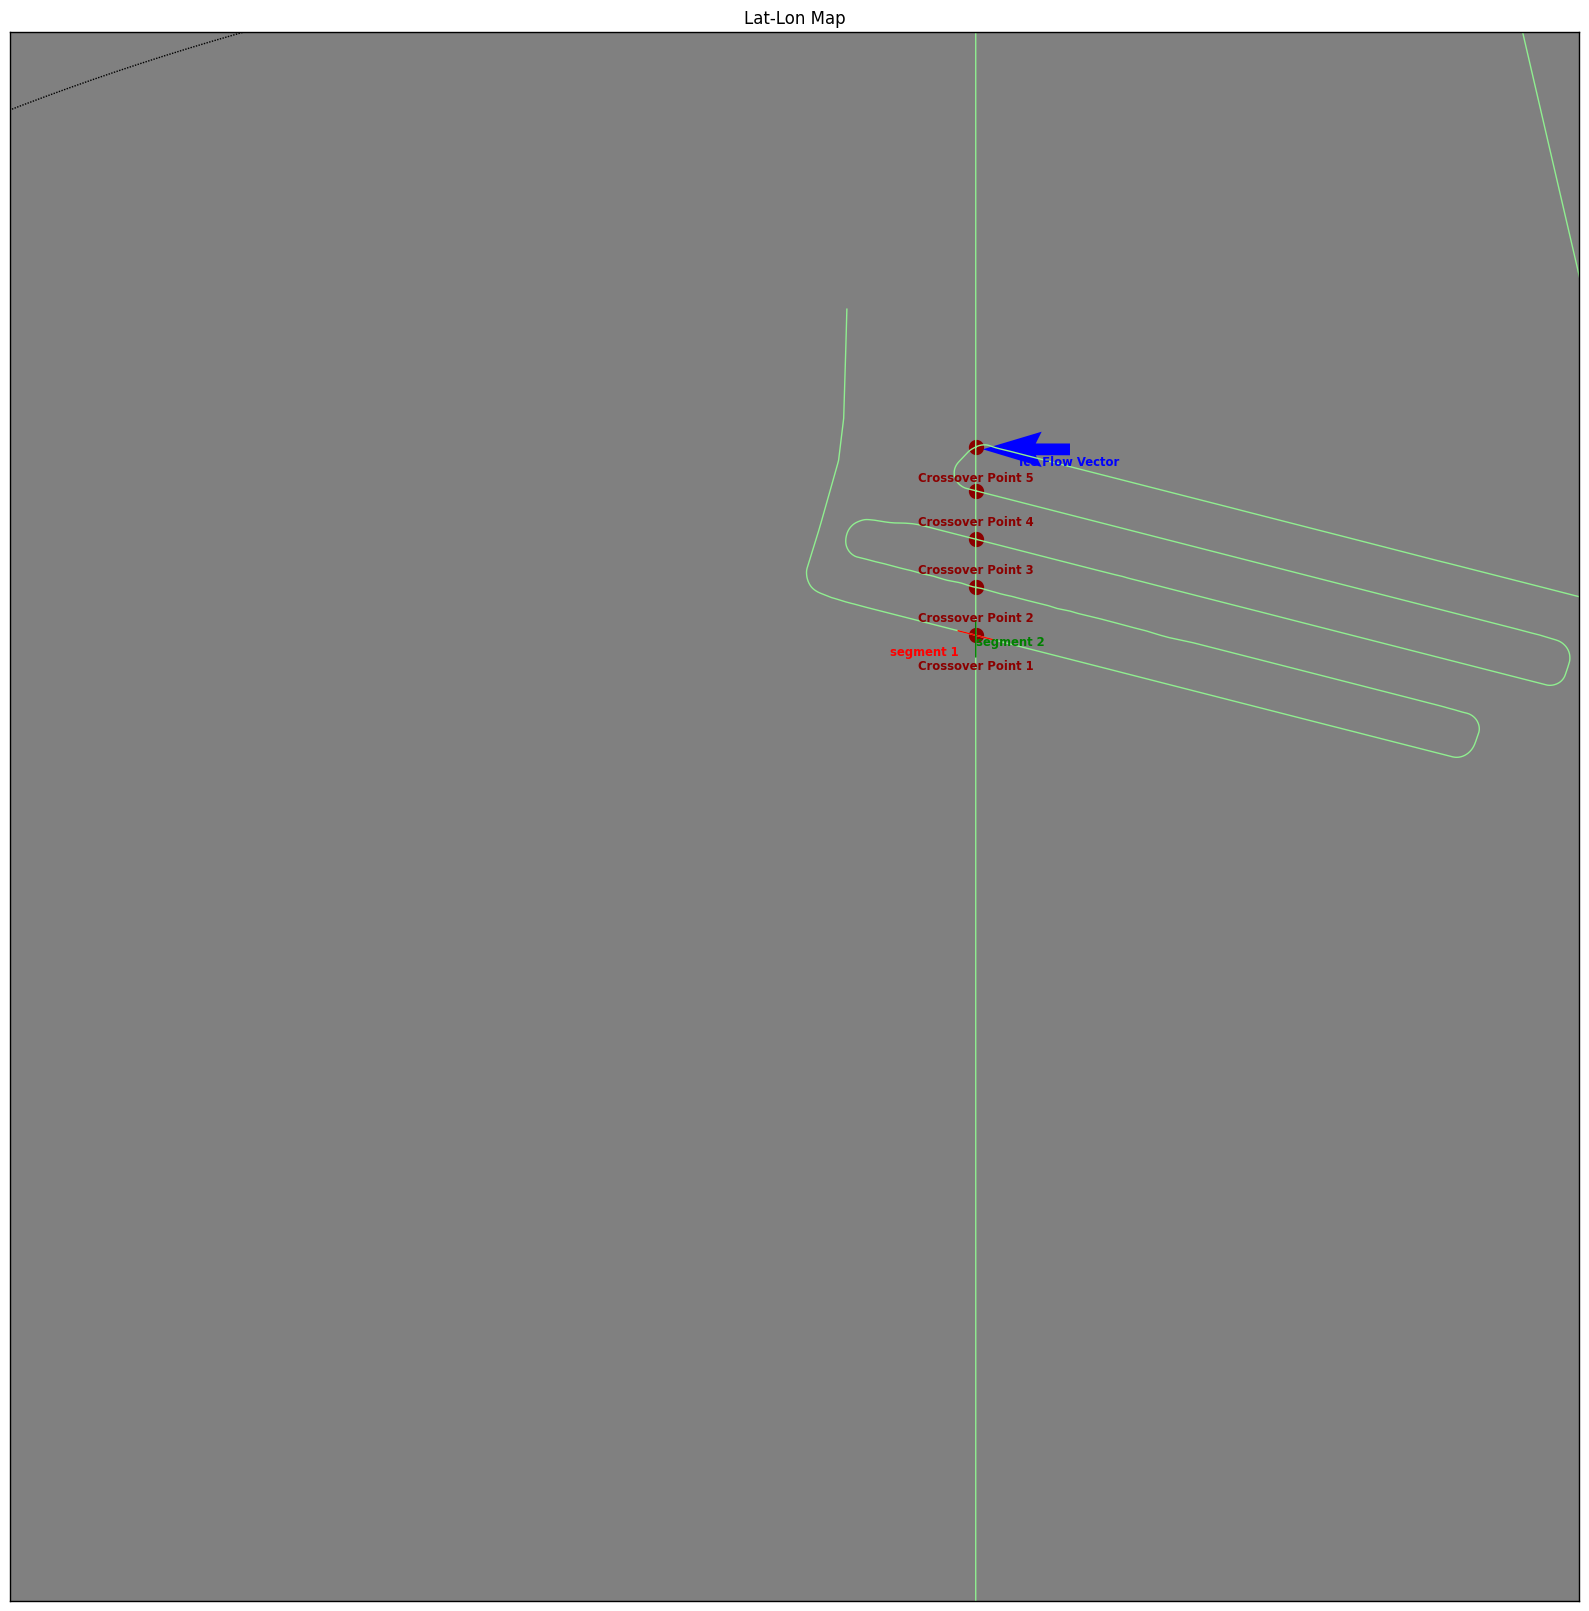

plotted map
--------------------

Plotting layers...
--------------------
Adjusting for surface twtt...
twtt: [2.08886564898153e-05, 1.926135603593487e-05]
scale factor: 0.07434954468011791
scale factor: 14.936342673040647


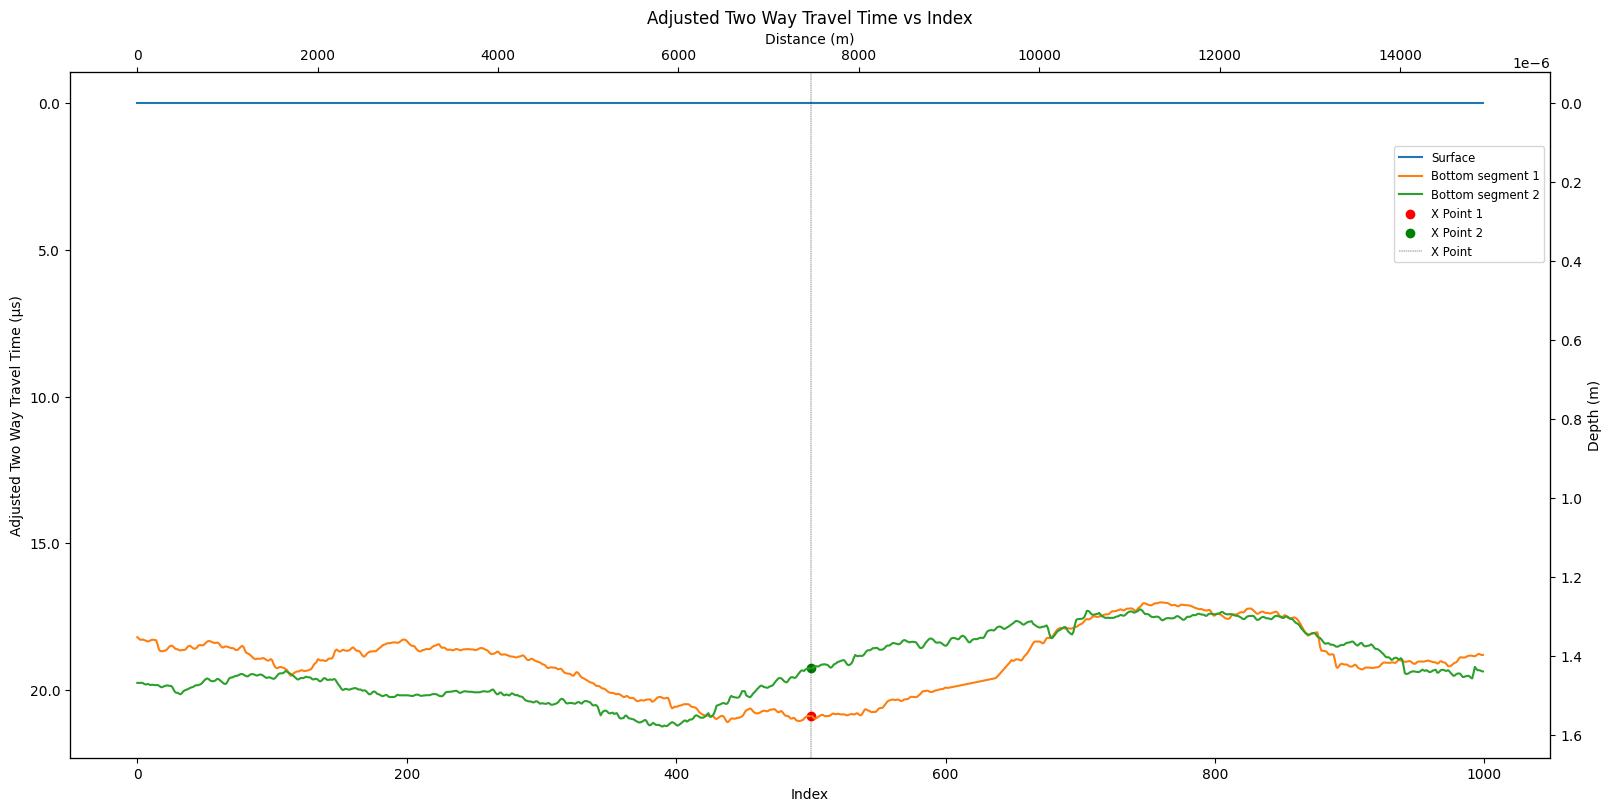

In [59]:
plot_map(layers, intersection_indices, intersection_points, iceflow_data, season1, flight1, zoom=False, cross_index=0,
         filename=(flight1 + "_and_" + flight2 + "crossover"))

plot_layers_at_cross(layers, intersection_indices, intersection_points, season1, flight1, filename=(flight1 + "_and_" + flight2 + "crossover"))

In [72]:
# repeat the above for every crossover point
flow_xy = [] # the flow vector in xy 
flow_heading_full = [] # the flow vector heading in angle1, angle2, distance (in meters)
flow_heading = []
plane_heading_1 = []
plane_heading_2 = []
angle = [] # the angle between the flow vector and the plane heading
twtt = twtt_at_point(layers[1], layers[0], intersection_indices, quiet=True)
delta_twtt = []
depth = []

for i in range(len(intersection_indices)):
    # convert the lat-lon point to xy and then to indices
    lat, lon = intersection_points[i] 
    # print(f"lat-lon {i}: \t\t{lat[0], lon[0]}")
    
    x, y = latlon_to_xy(lat, lon)
    # print(f"x: {x}, y: {y}")
    
    x_index, y_index = x_to_index(x), y_to_index(y)
    # print(f"x_index: {x_index}, y_index: {y_index}")
    
    nearest_x_index, nearest_y_index = xy_to_nearest_unmasked_index(x, y, iceflow_data, max_radius=10)
    
    # find the nearest good iceflow_data to the crossover point
    nearest_lat = iceflow_data[4][nearest_x_index][nearest_y_index]
    nearest_lon = iceflow_data[5][nearest_x_index][nearest_y_index]
    # print(f"nearest_lat-lon: \t{nearest_lat, nearest_lon}")

    flow_xy.append([iceflow_data[2][nearest_x_index][nearest_y_index], iceflow_data[3][nearest_x_index][nearest_y_index]])
    print(f"flow at nearest: {flow_xy[i]}")
    
    # find the heading of the flow vector   
    flow_heading_full.append(xyindex_vector_to_heading(nearest_x_index, nearest_y_index, flow_xy[i][0], flow_xy[i][1]))
    flow_heading.append(flow_heading_full[i][0])
    print(f"flow_heading[{i}]: {flow_heading[i]}")

    # find the heading of the first segment
    plane_heading_1.append(find_heading(layers[0], intersection_indices[i][0]))
    # print(f"heading_1[{i}]: {plane_heading_1[i]}")

    # find the heading of the second segment
    plane_heading_2.append(find_heading(layers[0], intersection_indices[i][1]))
    # print(f"heading_2[{i}]: {plane_heading_2[i]}")
    
    # plane_flow_angle = min(abs(plane_heading_1[i] - flow_heading[i]), abs(plane_heading_2[i] - flow_heading[i]))
    plane_flow_angle = max(abs(plane_heading_1[i] - flow_heading[i]), abs(plane_heading_2[i] - flow_heading[i]))

    # print(f"plane_flow_angle: {plane_flow_angle}")
    angle.append(plane_flow_angle)
    
    # find the twtt at the crossover point on both segments
    # print(f"twtt{i}: {twtt[i]}")
    # delta_twtt.append(twtt[i][1] - twtt[i][0])
    # append the absolute value of the twtt
    delta_twtt.append(abs(twtt[i][1] - twtt[i][0]))
    # print(f"delta_twtt[{i}]: {delta_twtt[i]}")
    
    # print the depth of the crossover point
    depth1 = twtt_to_depth(twtt[i][0], refractive_index=1.77)
    depth2 = twtt_to_depth(twtt[i][1], refractive_index=1.77)
    print(f"depth1: {depth1}, depth2: {depth2}")
    depth.append((depth1 + depth2) / 2)
    print(section_break)


length = len(delta_twtt)
while i < length: # remove any nan valued points from the lists
    if math.isnan(delta_twtt[i]):
        delta_twtt.pop(i)
        flow_xy.pop(i)
        angle.pop(i)
        magnitude.pop(i)
        plane_heading_1.pop(i)
        plane_heading_2.pop(i)
        intersection_indices.pop(i)
        intersection_points.pop(i)
        print(f"intersection {i} removed")
        print(section_break)
        length -= 1
    else:
        i += 1
        

flow at nearest: [-17.55111, 44.564808]
flow_heading[0]: 71.45622055438372
depth1: 1769.0004727116896, depth2: 1631.1890594423874
--------------------

flow at nearest: [-17.010925, 35.793148]
flow_heading[1]: 71.62407883376417
depth1: 1607.3579745542215, depth2: 1570.5277182266204
--------------------

flow at nearest: [-5.869399, 47.225574]
flow_heading[2]: 71.79765919773178
depth1: 1798.6046169875613, depth2: 1783.9232490273573
--------------------

flow at nearest: [3.4975054, -0.25968933]
flow_heading[3]: 71.97033601486729
depth1: 1496.8969850975018, depth2: 1488.62938847437
--------------------

flow at nearest: [0.10489411, -2.0576596]
flow_heading[4]: 72.1119608944309
depth1: 1303.430211787804, depth2: 1290.4634928335968
--------------------



C:\Users\rj\AppData\Local\Temp\ipykernel_22108\4126603246.py:38: RankWarning: Polyfit may be poorly conditioned
  model5 = np.poly1d(np.polyfit(x, y, 5))


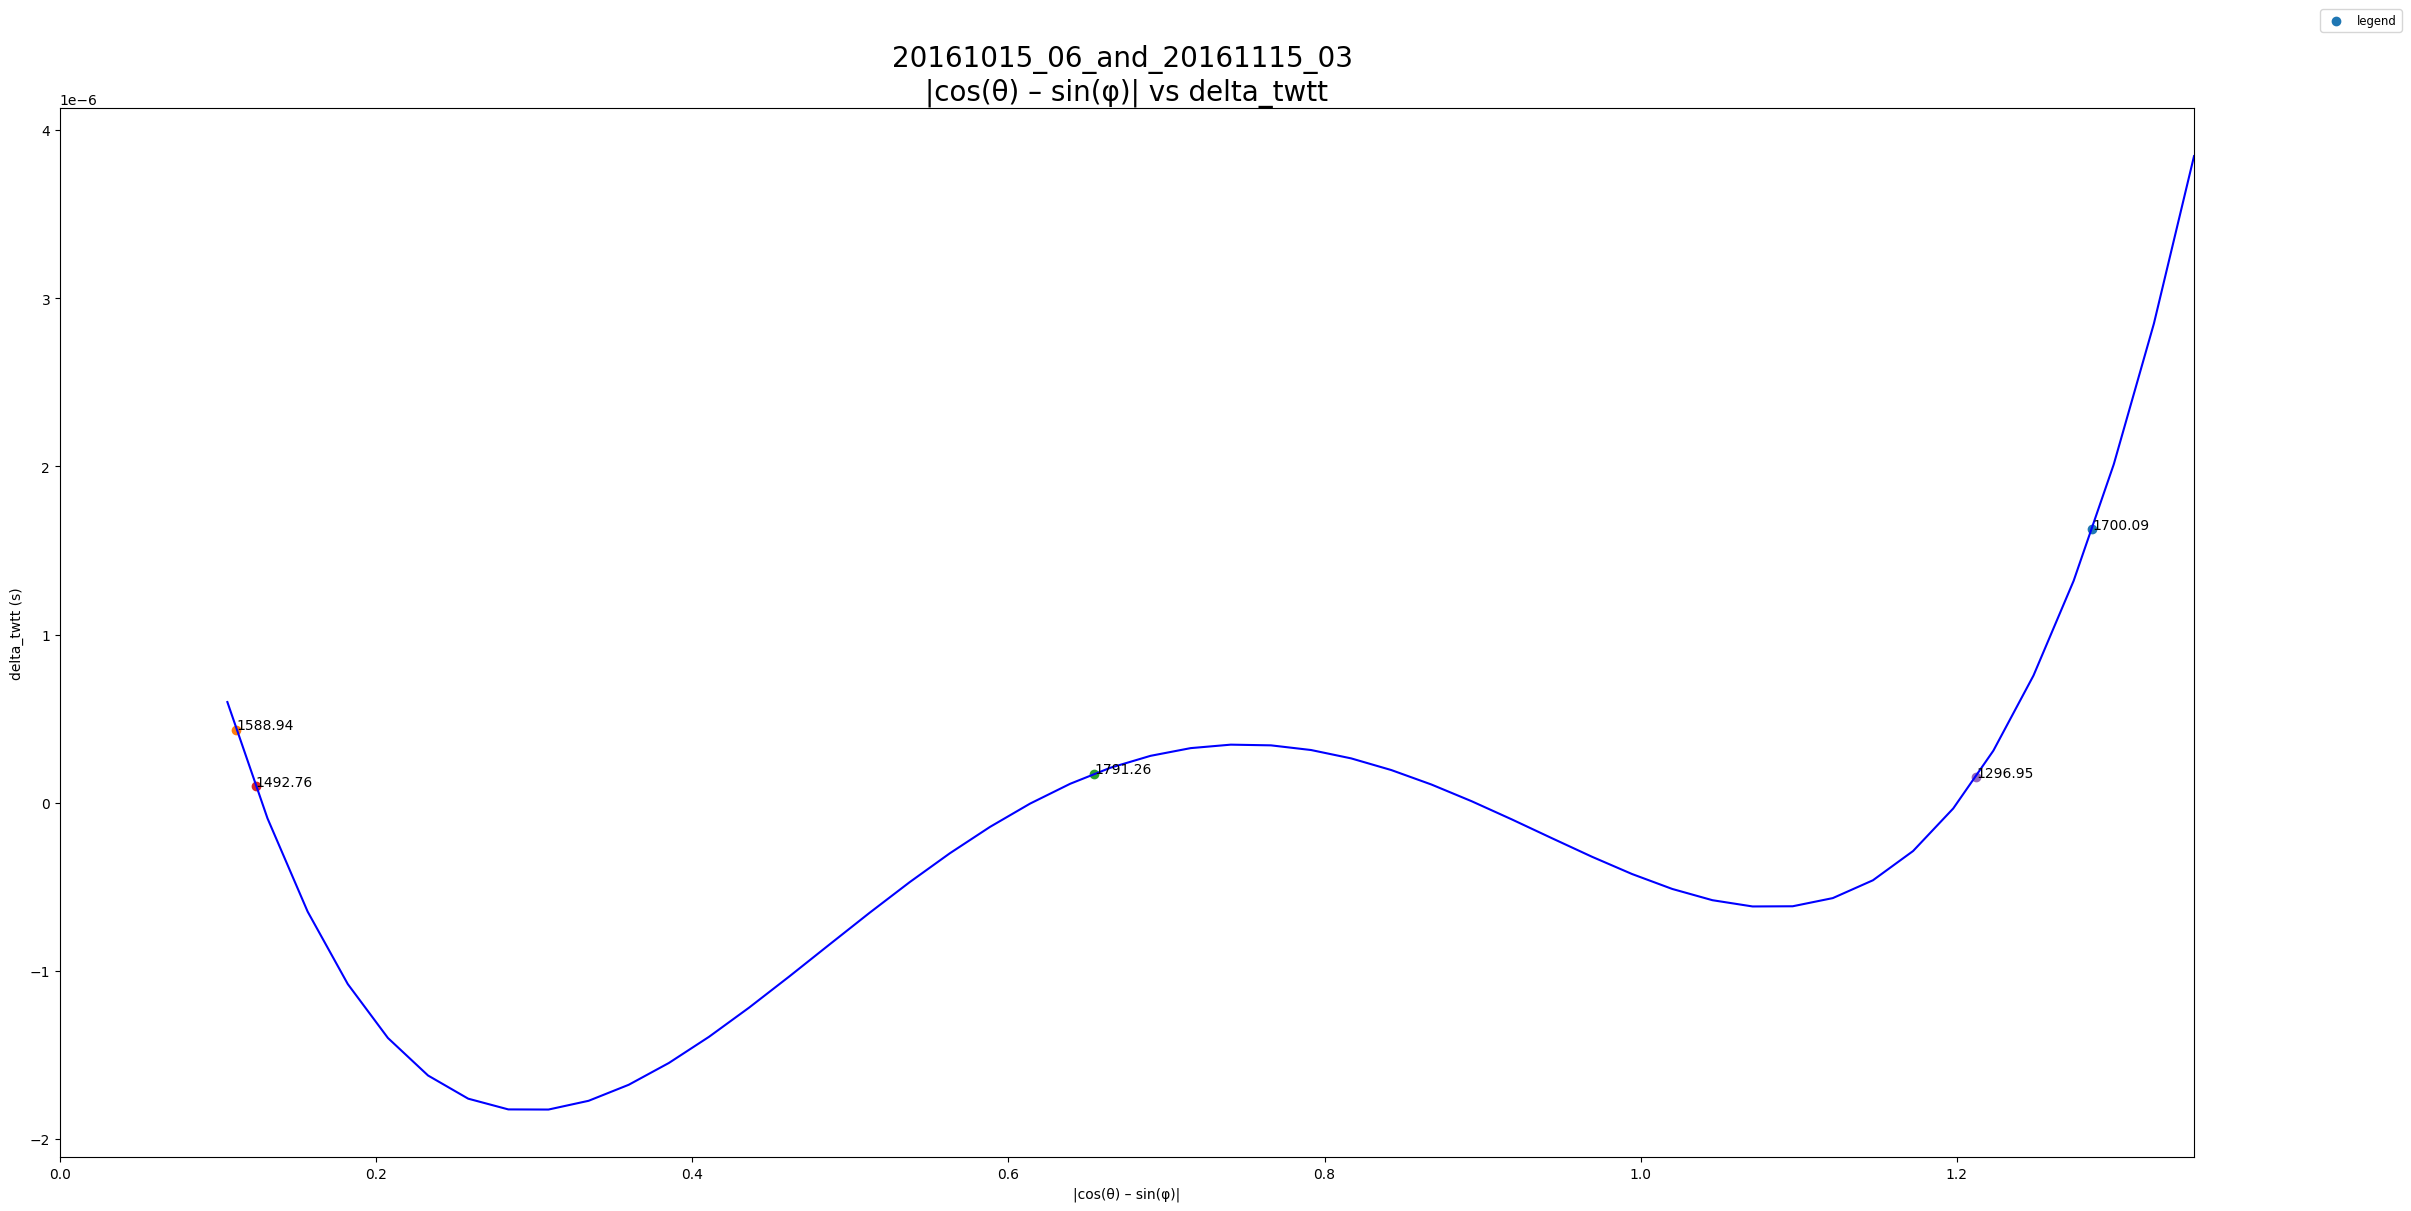

saved plot as C:\Users\rj\Documents\cresis_project\screens\20161015_06_and_20161115_03_cos_angle_heading_vs_delta_twtt.png


In [109]:
"""
Copied from doit.ipynb on 05May24. The original code should be turned into a function and called here.
"""
plt.figure(figsize=(24, 12), layout='constrained')
xdata = []
ydata = []
for i in range(len(delta_twtt)):
    theta = angle[i]
    phi = abs(plane_heading_1[i] - plane_heading_2[i])
    # print(f"theta: {theta}, phi: {phi} for i: {i}\n cos(theta): {np.cos(np.radians(theta))}, sin(phi): {np.sin(np.radians(phi))}")
    plt.scatter(np.abs(np.cos(np.radians(theta)) - np.sin(np.radians(phi))), delta_twtt[i], label='segment 1')  # angle - heading   
    xdata = np.append(xdata, np.abs(np.cos(np.radians(theta)) - np.sin(np.radians(phi))))
    ydata = np.append(ydata, delta_twtt[i])
    # add a label with the depth of the crossover point near the point
    plt.text(np.abs(np.cos(np.radians(theta)) - np.sin(np.radians(phi))), delta_twtt[i], f"{depth[i]:.2f}", fontsize=10)

plt.xlabel("|cos(θ) – sin(φ)|")
plt.ylabel("delta_twtt (s)")
plt.title(f"{flight1}_and_{flight2} \n|cos(θ) – sin(φ)| vs delta_twtt", fontsize=20)
plt.legend(["legend"], fontsize='smaller', loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.yscale('log')


# fit a curve to the data using scipy.optimize curve_fit
# def func(x, a, b, c):
    # return a * x 

# popt, pcov = curve_fit(func, x, y)
# optimizedParameters, pcov = optimize.curve_fit(func, xdata, ydata)
# plt.plot(xdata, func(xdata, *optimizedParameters), label='fit', color='red')
x = xdata
y = ydata
#fit polynomial models up to degree 5
model1 = np.poly1d(np.polyfit(x, y, 1))
model2 = np.poly1d(np.polyfit(x, y, 2))
model3 = np.poly1d(np.polyfit(x, y, 3))
model4 = np.poly1d(np.polyfit(x, y, 4))
model5 = np.poly1d(np.polyfit(x, y, 5))

#create scatterplot
polyline = np.linspace(.95 * min(xdata), 1.05 * max(xdata), 50)
# plt.scatter(df.x, df.y)

#add fitted polynomial lines to scatterplot 
# plt.plot(polyline, model1(polyline), color='green')
# plt.plot(polyline, model2(polyline), color='red')
# plt.plot(polyline, model3(polyline), color='purple')
plt.plot(polyline, model4(polyline), color='blue')
# plt.plot(polyline, model5(polyline), color='orange')

# set the y max to 1.1 * the max delta_twtt
# plt.ylim(-.5 * min(delta_twtt), 1.1 * max(delta_twtt))
# set the x bounds to 0.9 * the min and 1.1 * the max of the x data
plt.xlim(0 * min(xdata), 1.05 * max(xdata))


# get the current directory
dir = os.getcwd()
plt.savefig(f"{dir}\\screens\\{flight1}_and_{flight2}_cos_angle_heading_vs_delta_twtt_logy.png", dpi=300)

plt.yscale('linear')
# save the plot as a png file with a high dpi named after the season and flight
plt.savefig(f"{dir}\\screens\\{flight1}_and_{flight2}_cos_angle_heading_vs_delta_twtt_lineary.png", dpi=300)
plt.show()

print(f"saved plot as {dir}\\screens\\{flight1}_and_{flight2}_cos_angle_heading_vs_delta_twtt.png")